A porcentagem de pixels brancos na imagem é: 31.11%


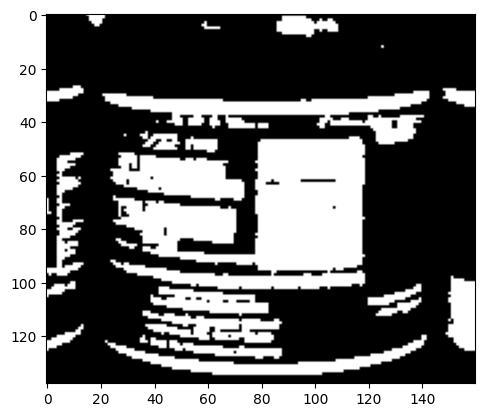

In [1]:
# label missing -> analisando white pixels

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('./bottles/train/train_64.jpg',cv.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv.threshold(img, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

img = im_bw[150:,100:260]

porcentagem = (cv.countNonZero(img) / img.size) * 100

# Exibe a porcentagem
print(f"A porcentagem de pixels brancos na imagem é: {porcentagem:.2f}%")
plt.imshow(img,'gray')

# label errada vai ser quando isso aqui tiver mt baixo
# bom fazer testes para ver como irá se portar dado o crop feito


# como ja vai ter passado pelo missing bottle, é ok

In [ ]:
# cap missing

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('./bottles/train/train_18.jpg',cv.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv.threshold(img, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

new_img = im_bw[0:100]

total_pixels = new_img.size

# Conta o número de pixels pretos (0)
black_pixels = total_pixels - cv.countNonZero(new_img)

# Calcula a porcentagem de pixels pretos
percentage_black_pixels = (black_pixels / total_pixels) * 100

# Exibe a porcentagem
print(f"A porcentagem de pixels pretos na imagem é: {percentage_black_pixels:.2f}%")
median_value = cv.medianBlur(img, 5)[img.shape[0] // 2, img.shape[1] // 2]
plt.imshow(new_img,'gray')
# treshhold de 20 eu acho

In [ ]:
# bottle missing
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('./bottles/train/train_46.jpg',cv.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv.threshold(img, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
plt.imshow(im_bw,'gray')

total_pixels = im_bw.size

# Conta o número de pixels pretos (0)
black_pixels = total_pixels - cv.countNonZero(im_bw)

# Calcula a porcentagem de pixels pretos
percentage_black_pixels = (black_pixels / total_pixels) * 100

# Exibe a porcentagem
print(f"A porcentagem de pixels pretos na imagem é: {percentage_black_pixels:.2f}%")
median_value = cv.medianBlur(img, 5)[img.shape[0] // 2, img.shape[1] // 2]

print(f"The median pixel value of the grayscale image is: {median_value}")

In [ ]:
# white label => aumentar o limiar só mesmo, que é pra cerca de 50+ porcento

# analisando white pixels

# label missing

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('./bottles/train/train_56.jpg',cv.IMREAD_GRAYSCALE)
(thresh, im_bw) = cv.threshold(img, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

new_img = im_bw[150:,100:260]

total_pixels = new_img.size

# Conta o número de pixels pretos (0)
#black_pixels = total_pixels - cv.countNonZero(new_img)

# Calcula a porcentagem de pixels pretos
percentage_black_pixels = (cv.countNonZero(new_img) / total_pixels) * 100

# Exibe a porcentagem
print(f"A porcentagem de pixels brancos na imagem é: {percentage_black_pixels:.2f}%")
median_value = cv.medianBlur(img, 5)[img.shape[0] // 2, img.shape[1] // 2]
plt.imshow(new_img,'gray')
# label errada vai ser quando isso aqui tiver mt baixo
# bom fazer testes para ver como irá se portar dado o crop feito

# Tem um limite superior e inferior, superior é qnt nao tem mas tem liquido e inferior é quando nao tem a botttle

# como ja vai ter passado pelo missing bottle, é ok

In [ ]:
# detect misaligned label

image = cv.imread('./bottles/train/train_11.jpg')
image = image[160:260,100:260]

# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve line detection
# Threshold the grayscale image to isolate white regions
_, thresholded = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)

# Detect lines using the Hough Line Transform with theta set to np.pi/2
lines = cv.HoughLines(thresholded, 1, np.pi / 2, threshold=100)
print(lines)

# Draw the detected horizontal lines on the original image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        if np.pi / 4 <= theta <= 3 * np.pi / 4:  # Check if the line is vertical (theta is close to pi/2)
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(image,'gray')


In [ ]:
# ainda falta:
# 1. CONTENT_HIGH,
1. CONTENT_LOW,
1. BOTTLE_SMASHED,